# Radial 1 dimensional heat transfer examples.

This notebook is an attempt to show some examples of how to generate results from the ThermPy1D script. It will cover a radial problem and a linear/cartesian problem.

In [1]:
import ThermPy1D
import pandas as pd

After importing the 1D script we need to create layer and boundary layer objects that will make up our model. Note that all the classes have Docstrings defining the required inputs.

In [14]:
pipe = ThermPy1D.solid_layer(1e-3,30,5e6,0,'Eurofer')
breeder = ThermPy1D.solid_layer(20e-3,50,2e7,0,'Breeder material')
BC_in = ThermPy1D.boundary_condition('fluid','inner', T_inf = 500+273, h=5e4, label='Helium out')
BC_out = ThermPy1D.boundary_condition('heat flux','outer',q=0, label='insulated')

These elements can then be assembled into a system. This is an example of a radial system which will perform cylindrical heat transfer.

In [15]:
b_in_pin = ThermPy1D.Radial1D(5e-3,[pipe,breeder],BC_in,BC_out)

At this point the system has been built but nothing has been solved. This will only happen after running a method which requires the solution to the system. We can however check some of the system attributes to check our inputs:

In [16]:
print(b_in_pin.radii)
print(b_in_pin.solid_map) #to see where the solid layers (1) and fluid layers (0) are distributed.

[0.005, 0.006, 0.026000000000000002]
[1, 1]


At this point the integration constants (C_) have not been solved for:

In [17]:
try:
    print(b_in_pin.C_)
except AttributeError: print('This has not been calculated yet.')

This has not been calculated yet.


These constants are solved for using the C method but any methods requiring the system to be solved will run C if the C_ attribute is missing:

In [18]:
b_in_pin.C()
print(b_in_pin.C_)

[[ 216.33333333]
 [1945.95432363]
 [ 135.2       ]
 [1532.97653027]]


In [19]:
del b_in_pin.C_ #delete attribute to show that other methods will solve for C_.
print('{:.3f} degC'.format(b_in_pin.T(5.1e-3))) #print temperature at input radial position
del b_in_pin.C_
print('{:.3e} W/m^2K'.format(b_in_pin.q(5.1e-3))) #print heat flux at input radial position
del b_in_pin.C_
print('{:.3e} W/m'.format(b_in_pin.Q(5.1e-3))) #print heat transfer at input radial position

802.952 degC
-1.260e+06 W/m^2K
-4.037e+04 W/m


Using the above methods to extract the temperature, heat flux and heat transfer at any position we can use the in-built plotting method to plot the temperature profile, heat flux and heat transfer throughout:

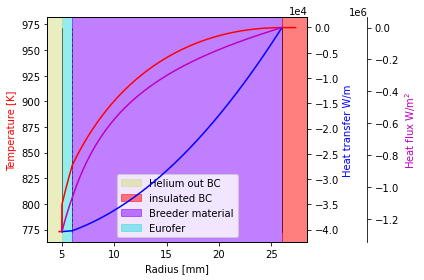

In [20]:
fig1=b_in_pin.plot_T(1000,1,1,1,0,1)
#plot with 1000 data points, show heat flux and heat transfer and bounds, and layer labels but not heat transfer labels

We can also generate a data frame object with readable column headings for export to a variety of formats using pandas inbuilt export methods (eg JSON, csv, xls etc.):

In [28]:
b_in_pin.T(100000e-3)

971.9426684873038

In [10]:
df.tail(3)

,object,layer thickness [m],label,layer type,conductivity [W/mK],volumetric heat generation [W/m^3],thermal resistance of outer layer interface [m^2K/W],r_inner [m],r_outer [m],T_(r_inner) [K],...,net heat transfer [W/m],internal heat generation [W/m],inner boundary heat transfer [W/m],outer boundary heat transfer [W/m],boundary condition side,boundary condition type,Bulk temperature [K],outer heat transfer coefficient [W/m^2K],net heat transfer into layer/boundary [W/m],boundary heat flux [W/m^2]
1,layer,0.1,Breeder material,solid,50.0,20000000.0,0.0,0.006,0.106,1901.865777,...,0.000141,703716.754404,-703716.754404,-0.000141,NaN,NaN,NaN,NaN,NaN,NaN
2,boundary condition,NaN,Helium out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,inner,fluid,773.0,50000.0,703889.542000,NaN
3,boundary condition,NaN,insulated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,outer,heat flux,NaN,NaN,-0.000141,0.0


Next we will perform a linear/cartesian example. The capability is identical to the radial/cylindrical example it's only some difference in inputs which be seen. First we will define some slightly different layers for this example but the linear examples can take the exact same layer objects as the radial.

In [11]:
armour = ThermPy1D.solid_layer(2.5e-3,173,20e6,1e-4,'Tungsten armour')
structure = ThermPy1D.solid_layer(7e-3,30,10e6,1e-5,'Eurofer')

We can then add some other boundary conditions (again the Linear1D class uses the same boundary condition objects and the Radial1D). 

In [12]:
fw_coolant = ThermPy1D.boundary_condition('fluid','outer', T_inf = 300+273, h=1e4, label='FW coolant')
fw_heatflux = ThermPy1D.boundary_condition('heat flux','inner', q=1e6, label='FW heat flux')

Now we can assemble into a Linear1D object and plot the results as before:

In [13]:
first_wall = ThermPy1D.Linear1D([armour, structure, coating], fw_coolant, fw_heatflux)
fig2 = first_wall.plot_T(1000,0,1,1,0,1)

NameError: name 'coating' is not defined

In [ ]:
results = first_wall.results()
results.to_csv('results.csv')
results.loc[:,['label', 'T_max [K]']]